# 베이즈 통계학 맛보기 

## 강의 소개

조건부확률에서 이어지는 개념인 베이즈 정리와 인과관계 추론에 대해 설명합니다.

 

베이즈 정리는 데이터가 새로 추가되었을 때 정보를 업데이트하는 방식에 대한 기반이 되므로 오늘날 머신러닝에 사용되는 예측모형의 방법론으로 굉장히 많이 사용되는 개념입니다. 이 때 나오는 사전확률, 사후확률, evidence 등의 개념은 강의에서 나오는 예제를 활용해서 정확히 이해하시기 바랍니다.

인과관계 추론의 경우, 조건부확률을 섣불리 사용해선 안되는 이유와 중첩효과를 제거함으로써 얻은 인과관계를 어떤 방식으로 활용할 수 있는지에 초점을 두고 공부하시면 좋겠습니다.

 

※ 과제/퀴즈의 난이도가 비교적 쉬운편이므로 다음날 23:59까지 제출완료 하셔야 합니다 !

## 조건부확률

P(A ∩ B) = P(B) * P(A|B) = P(A) * P(B|A) 

이걸 변형해서 

P(B|A) = P(A ∩ B) / P(A) = P(B) * (P(A|B) / P(A))

이렇게 바꾸면, A라는 새로운 정보가 주어졌을 때 P(B)로부터 P(B|A) 를 계산하는 방법을 제공. 

### 연습문제 

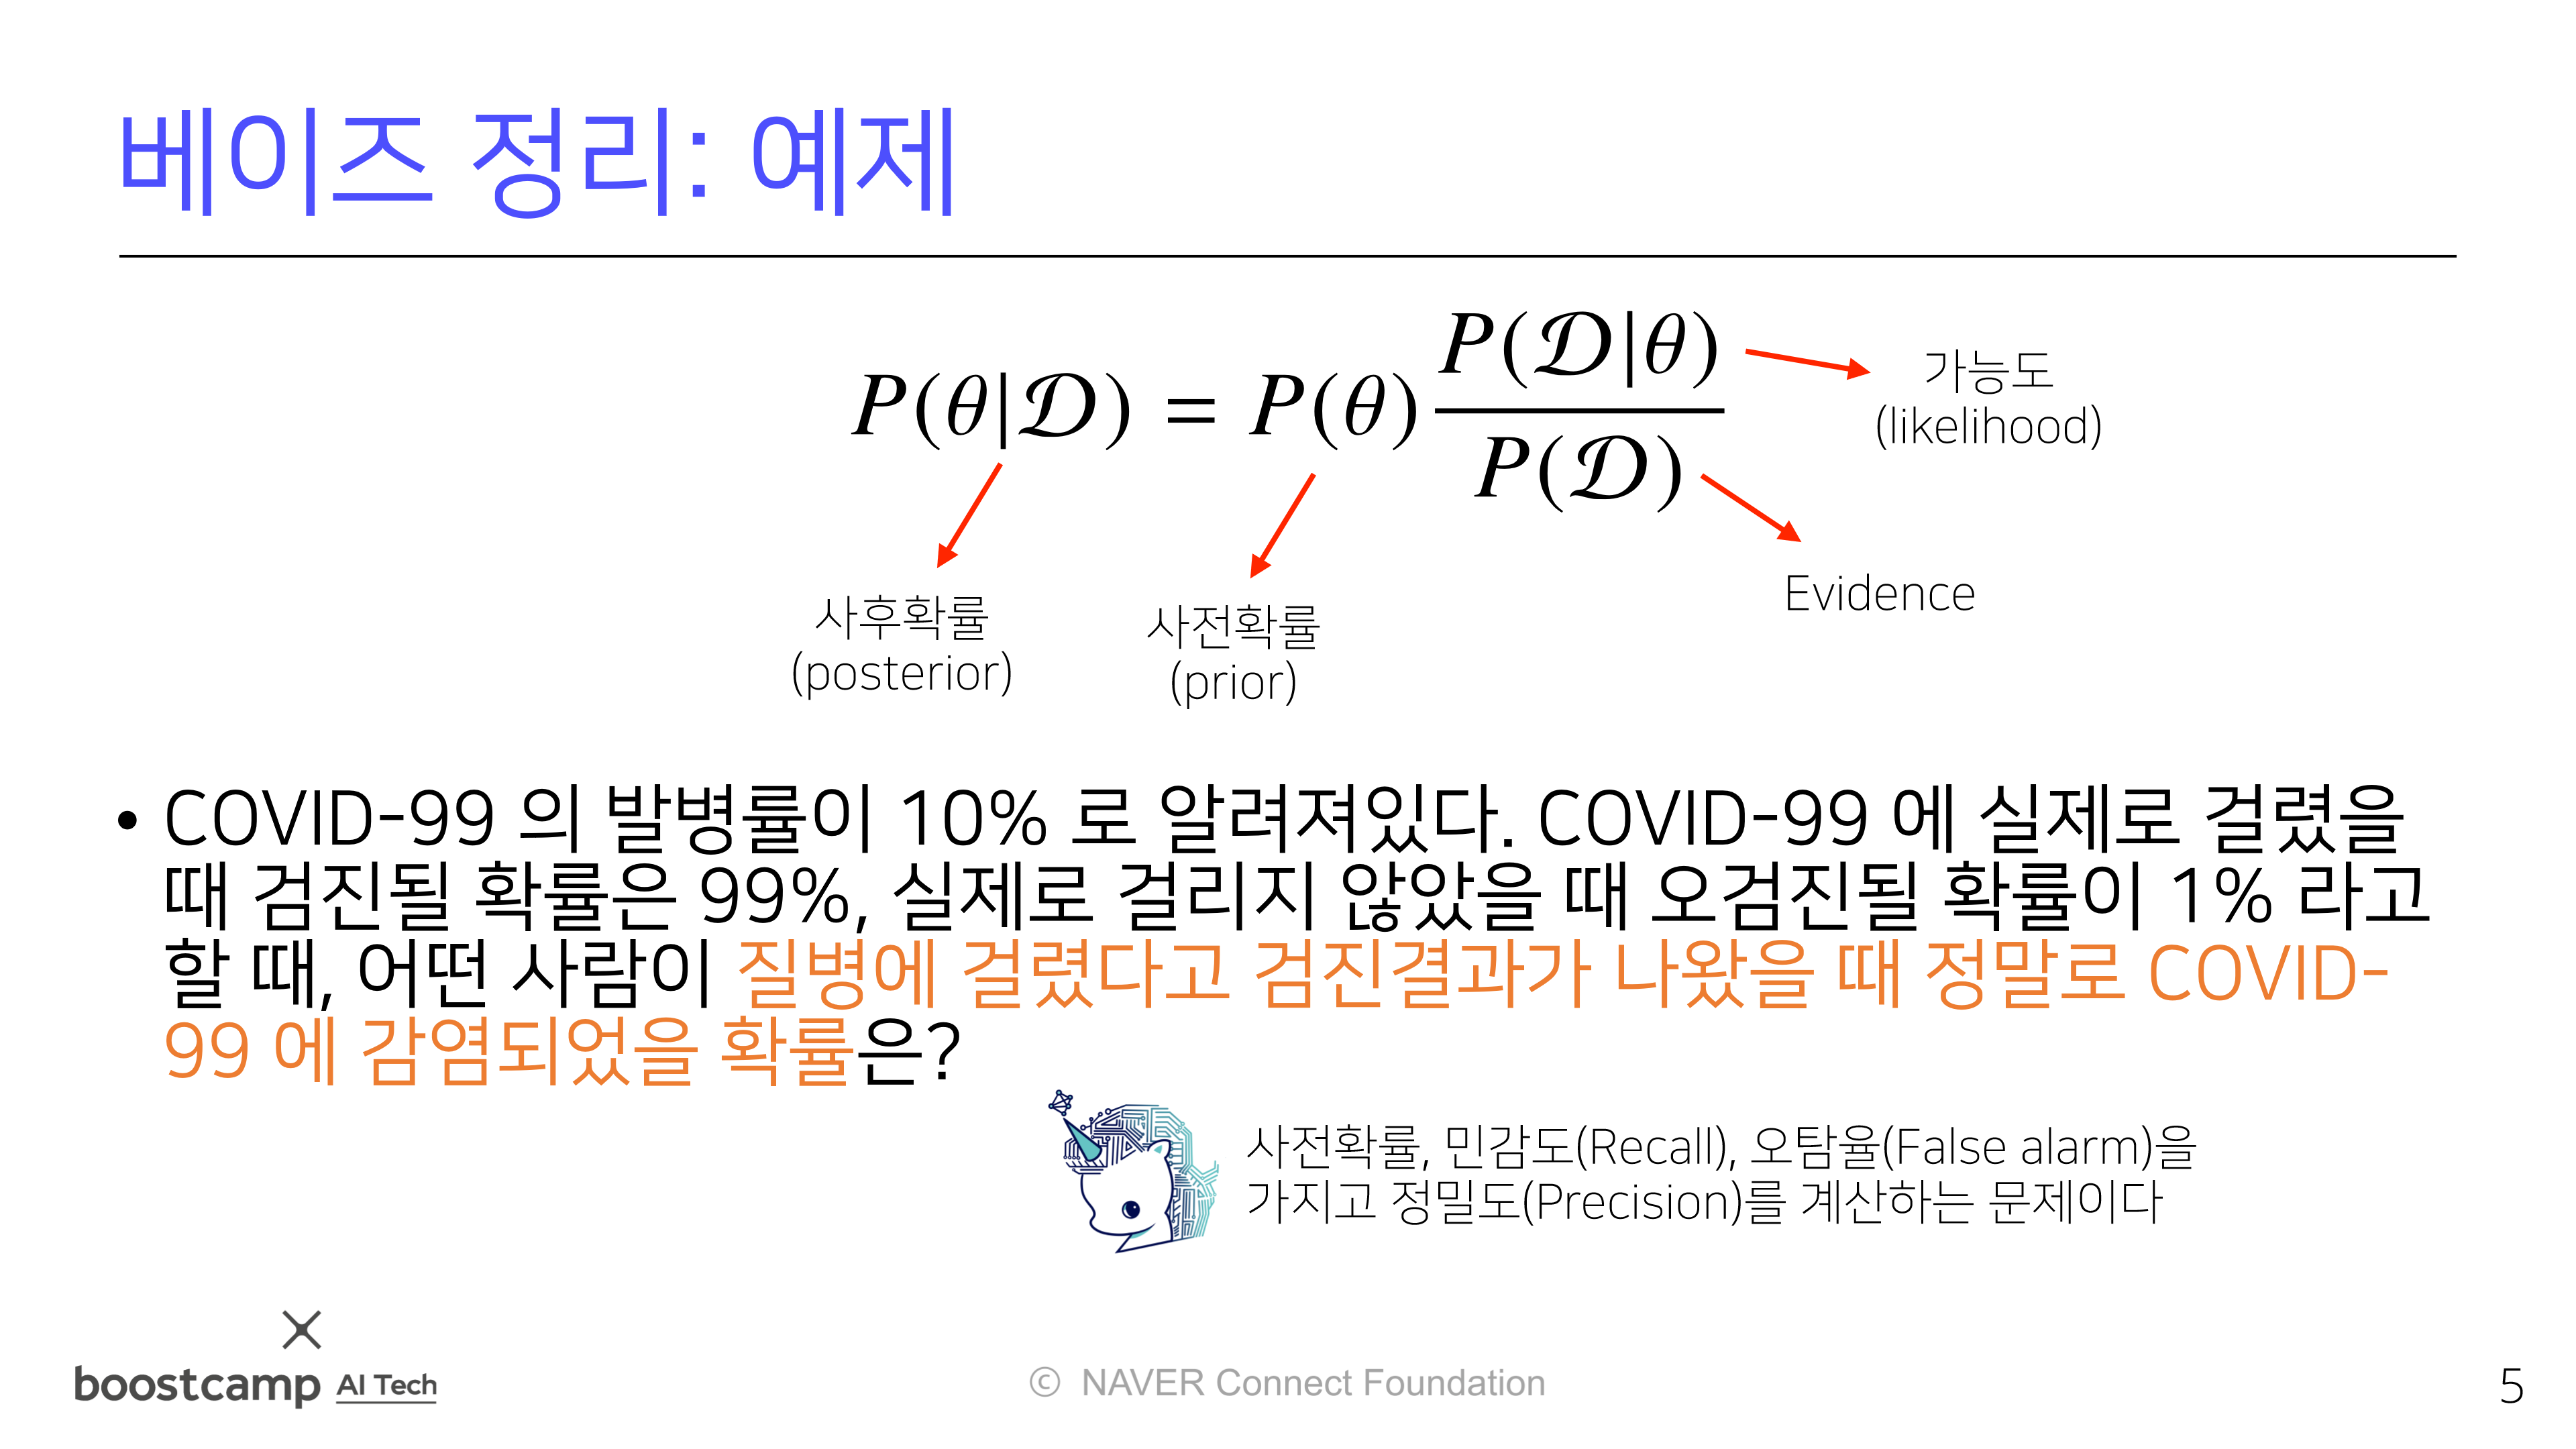

- D는 새로 관찰하는 데이터
- theta는 hypothesis, 우리가 모델링하는 이벤트, 모델에서 계산하고자 하는 parameter (모수)
- 사후확률 posterior: 데이터를 관찰했을 때 이 hypothesis가 성립할 확률. 관찰한 이후에 보니까 사후확률. bayes 적용한 후. 
- 사전확률 prior: 데이터 없는 상태에서 사전에 주어진 확률. 분석 전 hypothesis에 대해 미리 세운 가설의 확률분포. 여기서 시작해 베이즈 정리를 통해 update 된다. 
    - 코로나는 10%의 사망률을 가지는 것으로 알려져 있다. 와 같은 정보. 
- likelihood: 현 parameter에서 이 데이터가 관찰될 확률. 
- evidence: 데이터 자체의 분포. 
    - 아래에서 다시 계산. 

문제에서 
- 사전확률: 알려진 발병률 10% P(C)
- P(D|theta): 걸렸을 때 검진될 확률 99%
- P(D|~theta): 안걸렸을 때 검진될 확률 (오검진) 1%

이다. 

이를 표로 나타내면 아래와 같다. 

|                      | Reality: True  | Reality: False      |
|----------------------|----------------|---------------------|
| Hypothesis: Positive | 0.99           | 0.01 False Positive |
| Hypothesis: Negative | False Negative |                     |

- evidence를 계산해보자. P(D)

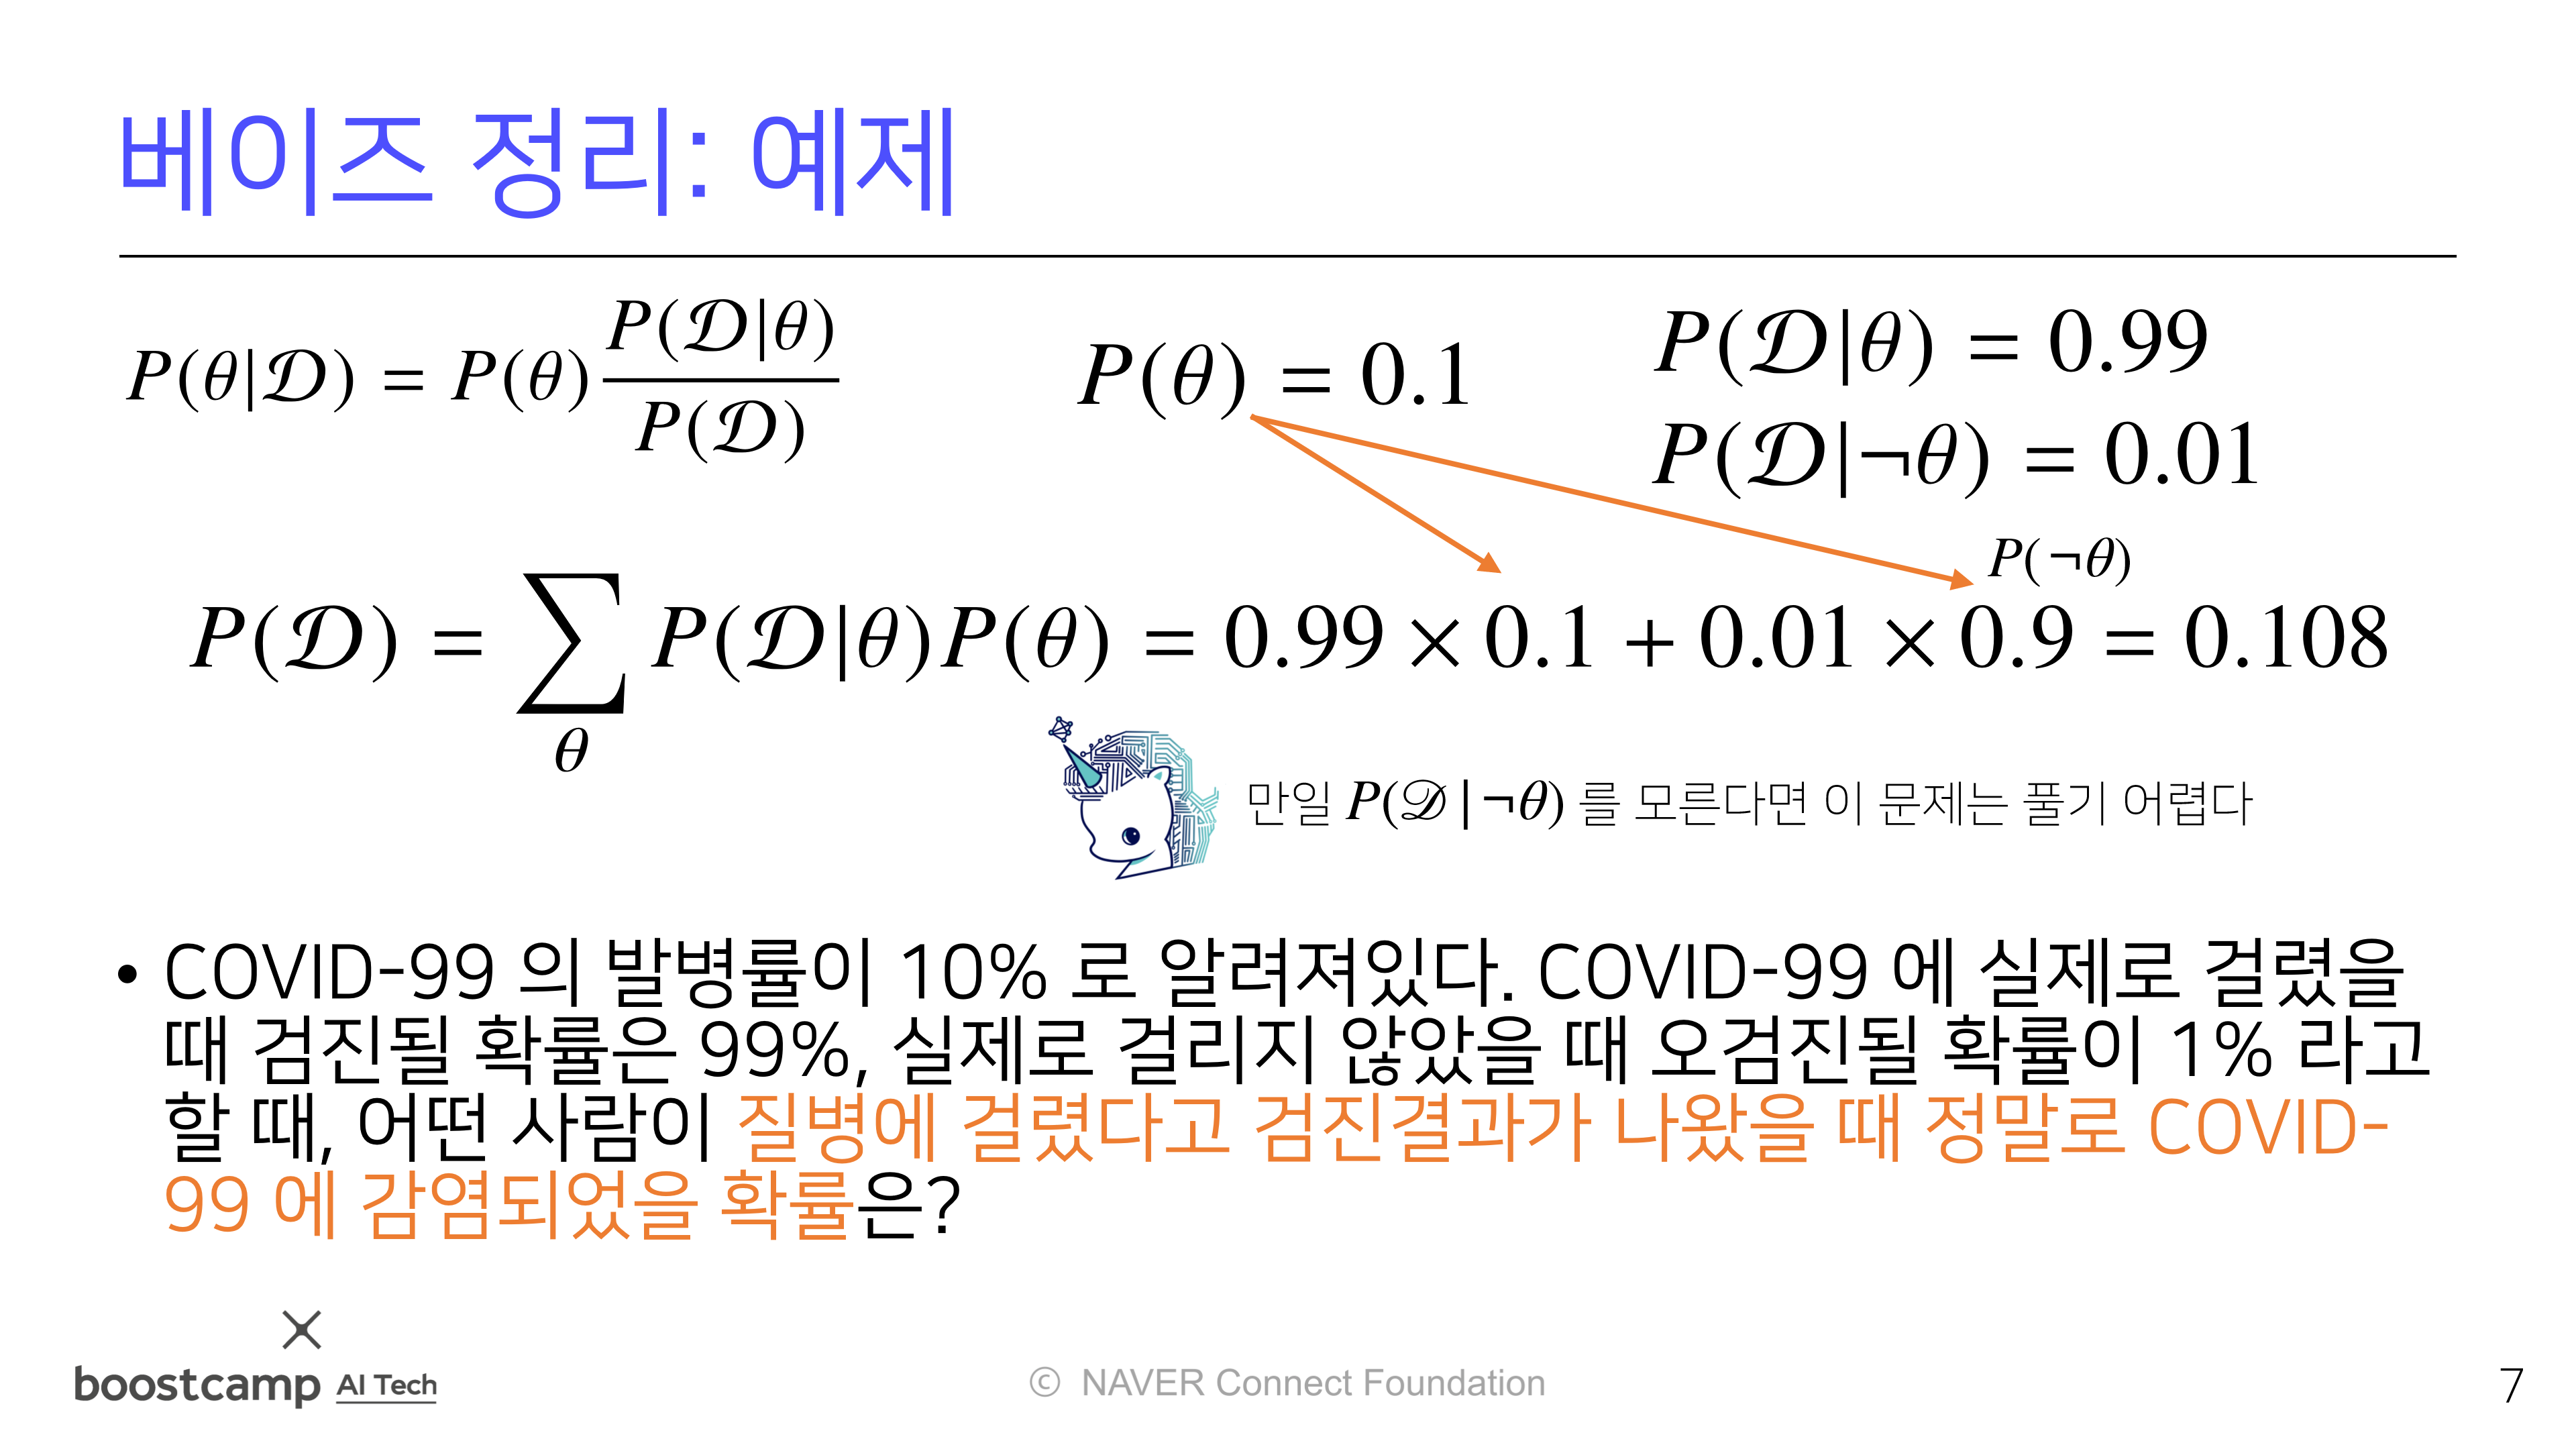

오탐율이 늘면 precision이 크게 떨어지게 된다. 

조건부 확률을 confusion matrix로 시각화 해볼 수 있다. 

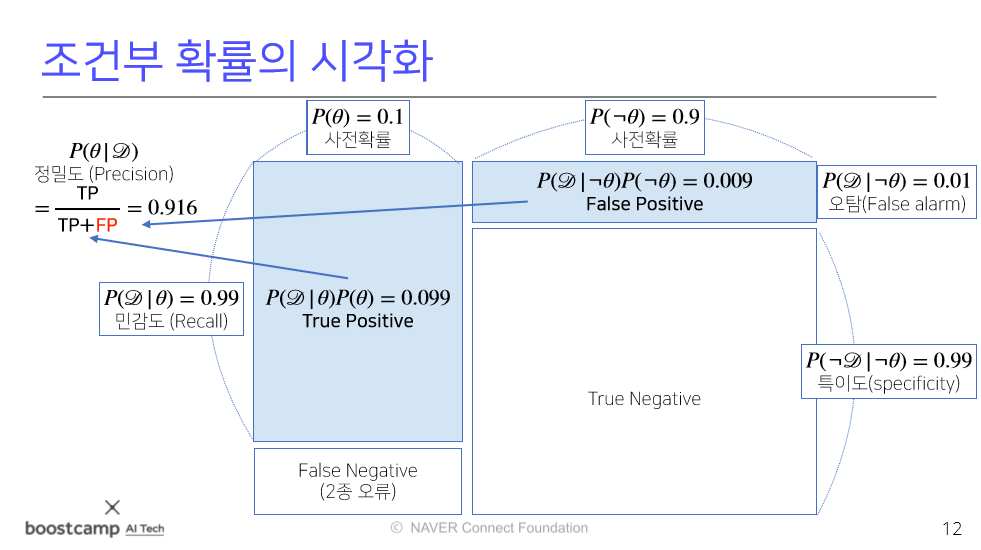

데이터 성격에 따라 1종오류를 줄일지, 2종오류를 줄일지 달라지게 된다. 

의료에서 병이 안걸렸는데 걸렸다 해 치료하는 것(False Positive) 보다 병에 걸렸는데 안걸렸다고 진단해 (False Negative) 생기는 문제가 훨씬 크기 때문에 FN를 줄이는 형식으로 최적화를 시킨다. 


- 민감도 recall: TP / (TP + FN) 
    - 의료 매트릭에서 유용
- 오탐율 false alarm: FP
- 정밀도 precision: TP / (TP + FP) 

베이즈 정리에선 새로 데이터가 들어왔을 때 갱신된 사후확률을 계산한다는 것에서 큰 의미가 있다. 

이전의 사후확률을 다음의 사전확률로 대입해서 계산하는 것. 

예를 들어, 두 번째 검진을 받았을 때도 양성이 나왔다면, 진짜 COVID에 걸렸을 확률은 1번만 받은 것과는 달라지게 된다. 

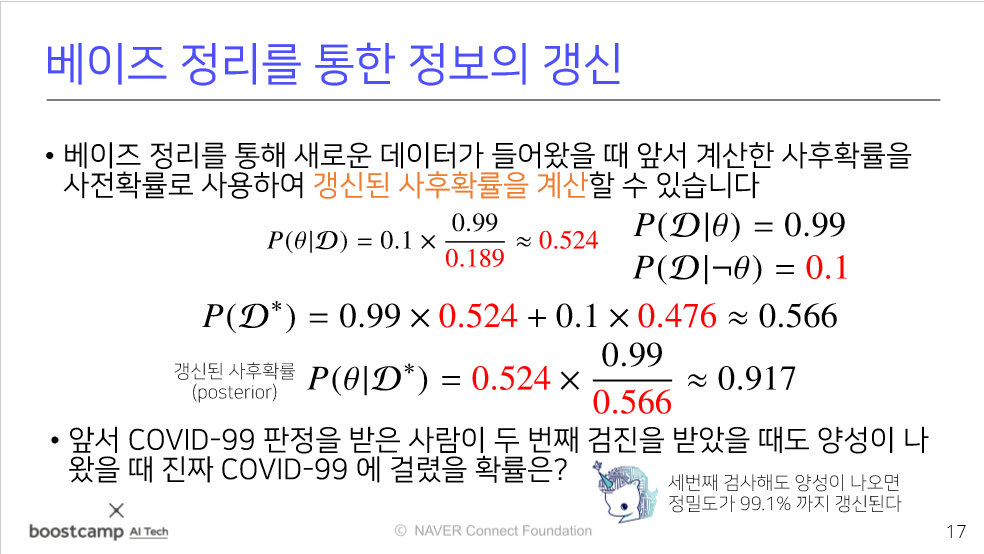

- 먼저 evidence를 갱신하고, 
- 1번째 사후확률을 2번째 사전확률로 넣어 계산 

## 조건부확률과 인과관계

**조심해야 할 점: 조건부 확률은 절대 인과관계(causality) 추론할 때 함부로 사용해선 안된다.**

많은 데이터 분석에서 이런 오류를 일으킨다. 데이터가 많아져도 해결이 되는건 아니다. 

### 인과관계는 언제 필요한가? 

인과관계는 데이터 분포의 변화에 강건한 robust 예측모형을 만들 때 필요하다. 

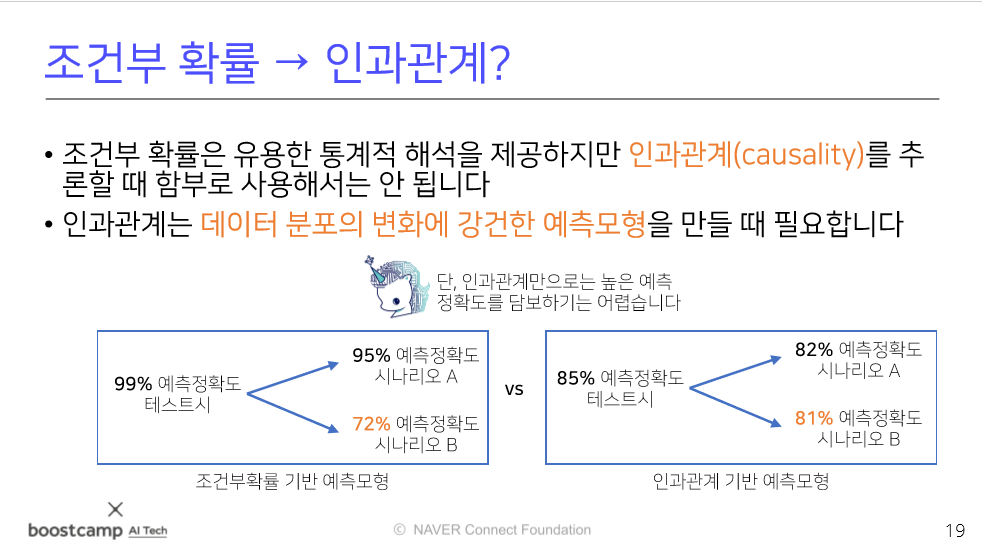

있는 데이터의 관계를 가지고 조건부 확률로 예측모형을 만들면 있는 데이터의 test set까지는 성능이 잘 나온다. 

하지만 조건부확률로만 만들면 유입되는 데이터 분포가 달라지면 시나리오에 따라 성능이 확 떨어질 수 있다. 

### 인과관계를 알아내는 방법

Treatment가 Response를 일으키는지 causality를 확인하기 위해선 공통으로 영향을 주는 요인 Z, confounding factor를 제거해야 한다. 

그렇지 않으면 spurious correlation이 나오게 된다. 

예를들어, T가 키(height)이고 R이 IQ라고 해보자. 상식적으로 관련이 없어야 하는데 아무렇게나 상관관계를 확인하면 키가 클수록 IQ가 높은 것으로 나온다. 

이는 Z, 나이라는 공통요인을 제거하지 않았기 떄문이다. 키가 클수록 성인이 되고 키가 커지면서 머리도 좋아질 수밖에 없기 때문에 엉뚱한 causality가 나오는 것이다. 따라서 키의 효과를 제거해야 한다. 

이는 결국 경제학의 cetris paribus의 정신과 같다. apple to apple의 비교를 할 때 causality를 관찰할 수 있다. 

#### 심슨의 모순 Simpson's paradox

조건부확률과 달리 중첩효과를 제거해주는 계산을 해야 한다. 

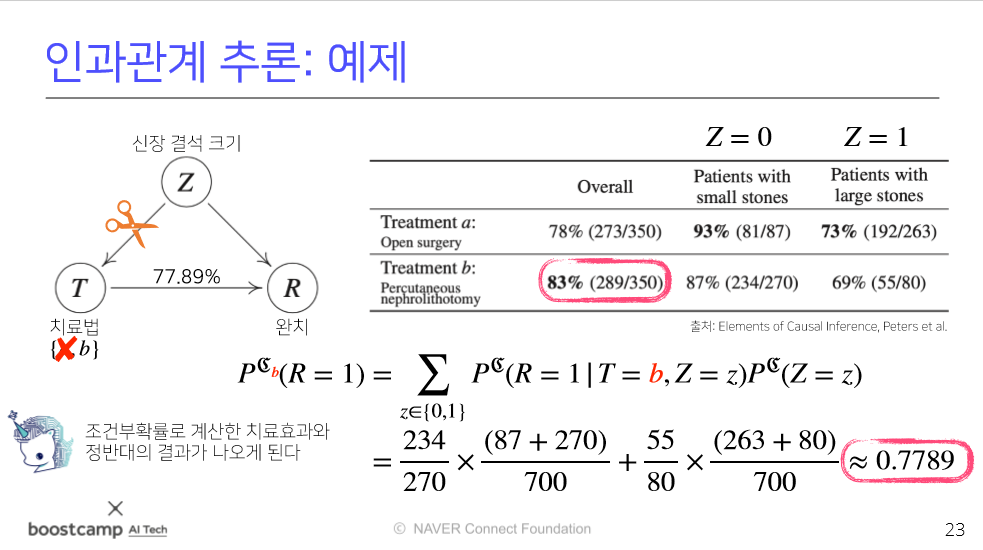

